<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/RK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrações numéricas de problemas físicos

Neste tutorial, vamos aplicar o método Runge-Kutta para resolver diversas equações de movimento de problemas físicos, tais como:



*   o pêndulo simples
*   elétron em um campo elétrico com gradiente
*   deriva de íons em campos cruzados
*   deriva de íons em campo de grad B
*   deriva de íons em campo B em um tórus




In [1]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn-poster')

# RK de primeira ordem 



In [2]:
def euler( fun, h, y0, tmax=10 ):
   N = int(tmax/h)
   y = np.zeros([N,len(y0)])
   y[0,:] = y0
   t = np.linspace(0,tmax,N)
   for n in range(0, N-1):
      k1 = h * fun( t[n], y[n,:] )
      y[n+1,:] = y[n,:] + 1.0*k1
   return y,t

# RK de segunda ordem

In [3]:


def midpoint( fun, h, y0, tmax=10 ):
   N = int(tmax/h)
   y = np.zeros([N,len(y0)])
   y[0,:] = y0
   t = np.linspace(0,tmax,N)
   for n in range(0, N-1):
      k1 = h * fun( t[n]     , y[n,:]        )
      k2 = h * fun( t[n]+h/2 , y[n,:]+k1/2.0 )
      y[n+1,:] = y[n,:] + 0.0*k1 + 1.0*k2
   return y,t

# RK de Quarta Ordem

In [4]:
def rk4( fun, h, y0, tmax=10 ):
   N = int(tmax/h)
   y = np.zeros([N,len(y0)])
   y[0,:] = y0
   t = np.linspace(0,tmax,N)
   for n in range(0, N-1):
      k1 = h * fun( t[n]       , y[n,:]        )
      k2 = h * fun( t[n]+h/2.0 , y[n,:]+k1/2.0 )
      k3 = h * fun( t[n]+h/2.0 , y[n,:]+k2/2.0 )
      k4 = h * fun( t[n]+h     , y[n,:]+k3     )
      y[n+1,:] = y[n,:] + k1/6.0 + k2/3.0 + k3/3.0 + k4/6.0
   return y,t


# Exemplo 1:
Teste os integradores da família RK para a EDO 
\begin{equation}
\dot{y} = y - t^2 +1
\end{equation}
com $y(0) = 0.5$.


In [88]:
def fun(t,y):
    ydot = y - t**2 + 1
    return ydot

In [89]:
# Parâmetros
tmax = 5
y0 = [.5]
h = 0.1



In [90]:
y_euler,t = euler( fun, h, y0, tmax )       #  Euler
y_mp,t = midpoint( fun, h, y0, tmax )    #  Midpoint
y_rk,t = rk4( fun, h, y0, tmax )         # Runge-Kutta 4
y_an = t**2 + 2.0*t + 1.0 - 0.5*np.exp(t) # Analitica

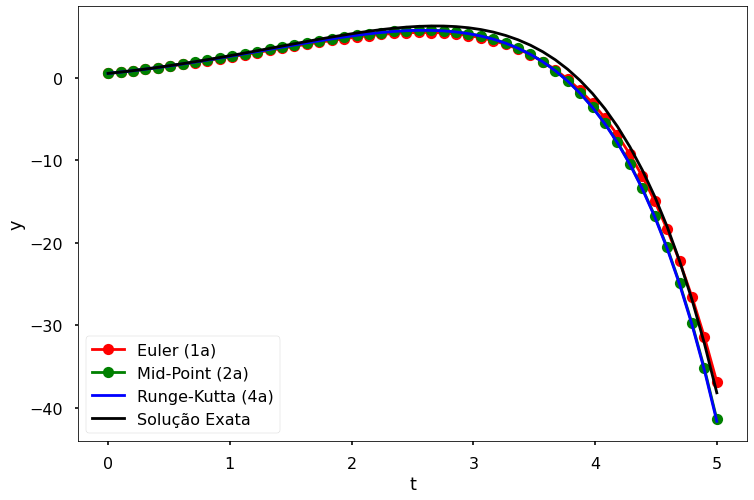

In [91]:
plt.figure(figsize = (12, 8))
plt.plot( t, y_euler, 'ro-', label='Euler (1a)' )
plt.plot( t, y_mp, 'go-', label='Mid-Point (2a)' )
plt.plot( t, y_rk, 'bx-', label='Runge-Kutta (4a)' )
plt.plot( t, y_an, 'k-',  label='Solução Exata' )
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='lower left')
plt.show()

# Equações de Movimento

Os métodos numéricos que vimos são projetados especificamente para resolver equações diferenciais de primeira ordem. Para tornar esses integradores úteis para resolver equações diferenciais de ordem superior, como as equações de movimento, devemos reduzir a ordem da equação diferencial à primeira ordem. 

Para entender como isso é feito, vamos primeiro usar o exemplo do pêndulo simples.

**Exemplo**: Reduza a equação do pêndulo de segunda ordem para a primeira ordem, onde

\begin{equation}
\begin{split}
Y(t) =\left[\begin{array}{c}
\Theta(t) \\
\dot{\Theta}(t)
\end{array}\right]
\end{split}
\end{equation}

ou seja

\begin{equation}
\begin{split}
\frac{dY(t)}{dt} =\left[\begin{array}{c}
Y_2(t) \\
-\frac{g}{l}Y_1(t)
\end{array}\right]
\end{split}
\end{equation}

In [92]:
def fun(t,y):

    theta,v_theta = y

    g = 9.8 # m/s2
    l = 0.5 # metros

    ydot = np.zeros(2)

    ydot[0] = v_theta
    ydot[1] = -g/l*theta
    return ydot

In [93]:
# Parâmetros
tmax = 5
y0 = [0.1,0.1] # condiçao inicial 
h = 0.01

In [94]:
 # Euler 
y_e,t = euler( fun, h, y0, tmax )
# Explicit Midpoint
y_mp,t = midpoint(fun, h, y0, tmax  )
# Runge-Kutta 4
y_rk,t = rk4( fun, h, y0, tmax  )

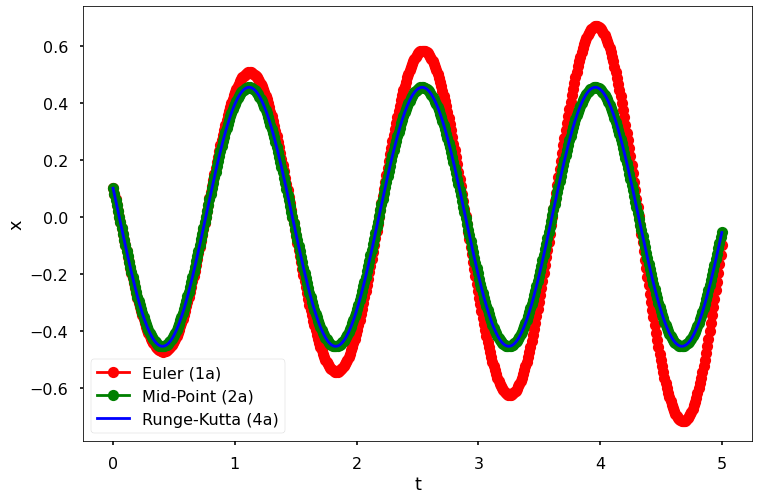

In [95]:
plt.figure(figsize = (12, 8))
plt.plot( t, y_e[:,1], 'ro-', label='Euler (1a)' )
plt.plot( t, y_mp[:,1], 'go-', label='Mid-Point (2a)' )
plt.plot( t, y_rk[:,1], 'bx-', label='Runge-Kutta (4a)' )
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower left')
plt.show()

# Exemplo: Drift E X B

Vamos simular a derivada de um elétron em um campo cruzado $\vec{E}\times\vec{B}$ onde $\vec{E} = E_0 \hat{j}$ e $\vec{B} = B_0 \hat{z}$. 

Use $E_0 =100 $ e $B_0 =1e-4$.    

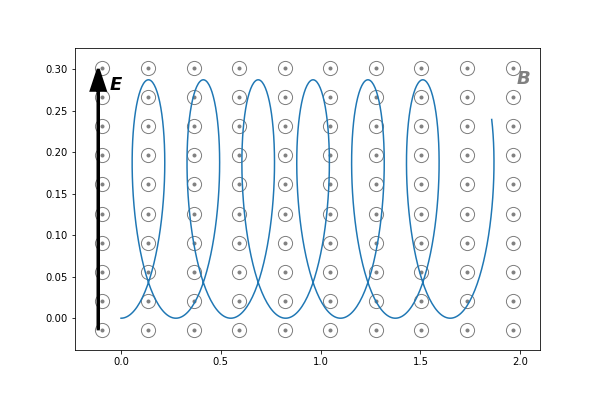

> Fonte: https://scipython.com/blog/exb-drift-for-constant-crossed-electric-and-magnetic-fields/



In [102]:
# Parâmetros físicos:

qe = 1.60217662e-19
me = 9.10938356e-31
B0 = 0.1

#Initial velocity [m/s]
vy0 = 1.0e6
y0 = np.array( [ 0, 0.0, 0.0, 0.0, vy0, 0.0 ] )


In [103]:
# Parametros para a integracao
tmax = 1.1e-6 
N = 100 
h = (tmax/N)

In [104]:
# Definindo a função dy/dx = f(x,y)
def funLarmor(t,Y):
   x, y, z, vx, vy, vz = Y
   # Razao carga/ massa (q/m)
   qm = -qe/me
   # Campo elétrico [V/m]
   Ex = 0.0
   Ey = 100
   Ez = 0.0
   # Campo magnético B [T]
   Bx = 0.0
   By = 0.0
   Bz = 1.0e-4
   # Equacoes de Newton-Lorentz  (em coordenadas Cartesianas)
   ax = qm * Ex + qm*( Bz*vy - By*vz )
   ay = qm * Ey + qm*( Bx*vz - Bz*vx )
   az = qm * Ez + qm*( By*vx - Bx*vy )
   ydot = np.array(( vx, vy, vz, ax, ay, az ))
   return ydot

In [105]:
 # Euler 
y_e,t = euler( funLarmor, h, y0, tmax )
# Explicit Midpoint
y_mp,t = midpoint(funLarmor, h, y0, tmax  )
# Runge-Kutta 4
y_rk,t = rk4( funLarmor, h, y0, tmax  )

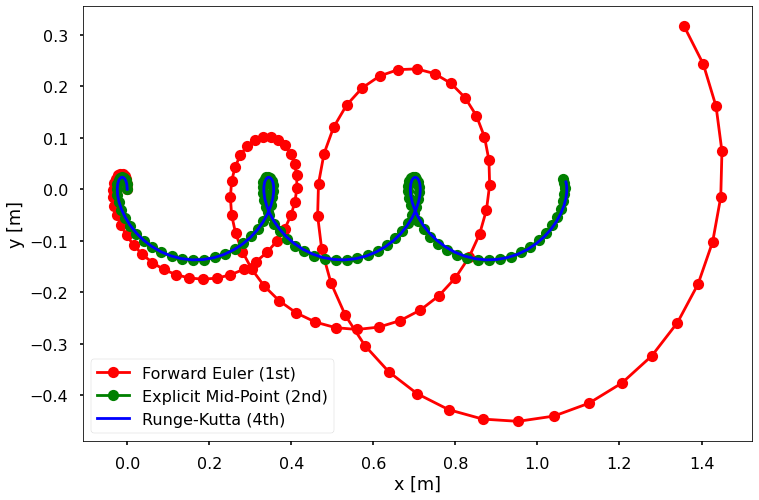

In [106]:
plt.figure(figsize = (12, 8))
plt.plot( y_e[:,0], y_e[:,1], 'ro-', label='Forward Euler (1st)' )
plt.plot( y_mp[:,0], y_mp[:,1], 'go-', label='Explicit Mid-Point (2nd)' )
plt.plot( y_rk[:,0], y_rk[:,1], 'bx-', label='Runge-Kutta (4th)' )
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(loc='lower left')
plt.show()


*Tarefa*: testar para um elétron.



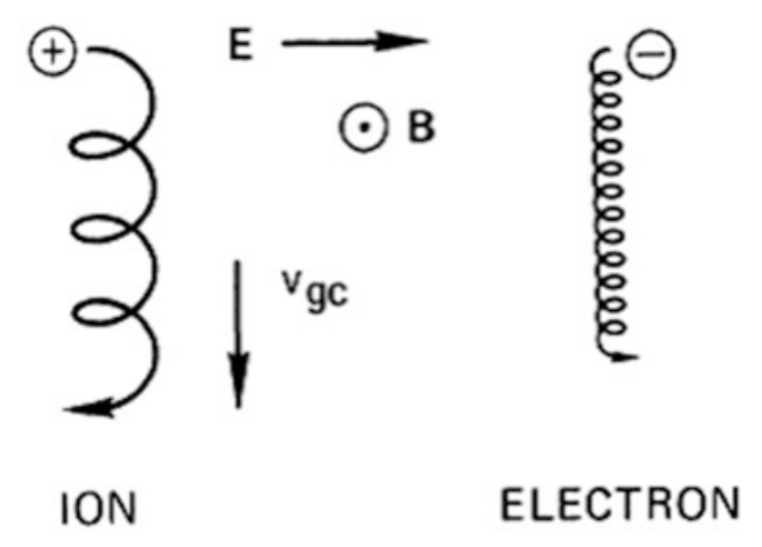



> Fonte: A search for signatures of Europa's atmosphere and plumes in Galileo charged particle data. Hans Huybrighs

> https://www.researchgate.net/publication/330035054_A_search_for_signatures_of_Europa%27s_atmosphere_and_plumes_in_Galileo_charged_particle_data









# Exemplo: Grad B

Agora vamos simular uma partícula num campo com gradiente de $\vec{B}$:
\begin{equation}
B_z = 0.5(1 + 50 x)
\end{equation}

$B_x = B_y = 0$.

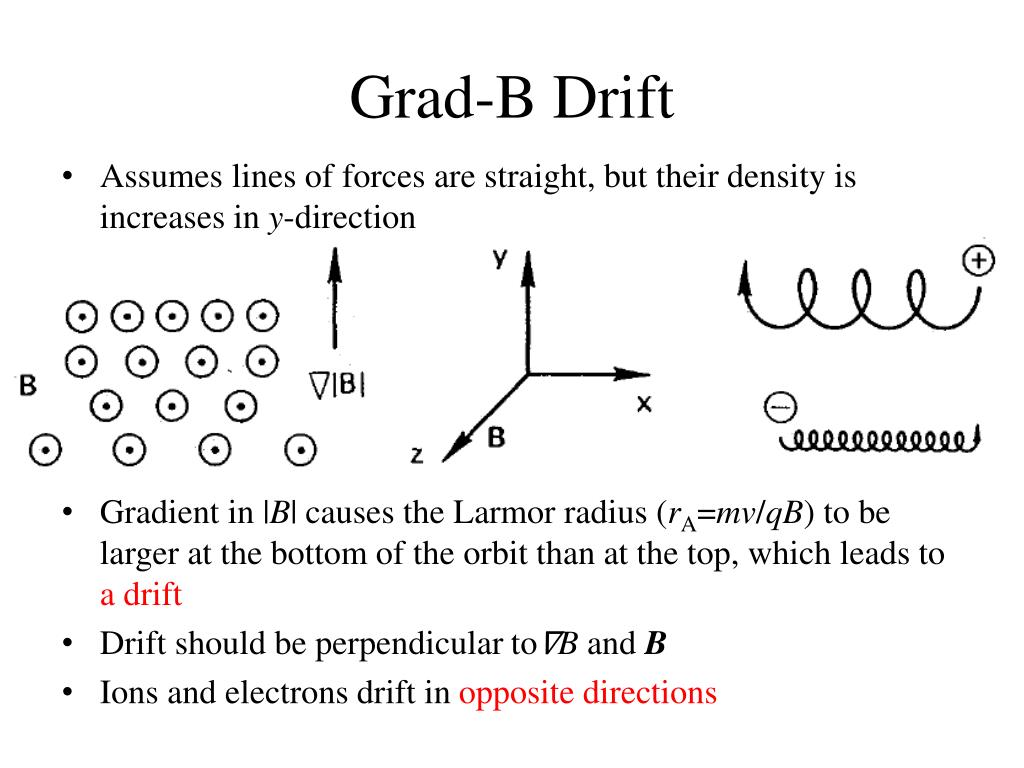



> Fonte: https://www.slideserve.com/elata/plasma-astrophysics-chapter-2-single-p-article-motion



In [107]:
# Convem escrever uma funcao para cada campo:

def Bfield(x,y,z):
    Bx = 0.0
    By = 0.0
    Bz = 0.5*(1.0 + 50.0*x)
    return Bx, By, Bz

In [108]:
def Efield(x,y,z):
    Ex = 0.0
    Ey = 0.0
    Ez = 0.0
    return Ex, Ey, Ez


In [109]:
def fun(t,X):
   x, y, z, vx, vy, vz = X
   # E-field [V/m]
   Ex, Ey, Ez = Efield(x,y,z)
   # B-field [T]
   Bx, By, Bz = Bfield(x,y,z)
   # Equacoes de Newton-Lorentz nas coordenadas Cartesianas
   Xdot = np.zeros(6)
   Xdot[0] = vx
   Xdot[1] = vy
   Xdot[2] = vz
   Xdot[3] = qm * ( Ex + vy*Bz - vz*By )
   Xdot[4] = qm * ( Ey + vz*Bx - vx*Bz )
   Xdot[5] = qm * ( Ez + vx*By - vy*Bx )
   return Xdot

In [110]:
qe = 1.60217662e-19
me = 9.10938356e-31
mp = 1.6726219e-27

# Charge-to-mass ratio (q/m)
qm = qe/mp

In [111]:
    # Initial velocity [m/s]
    vy0 = 1.0e5

    # Magnetic Field at the origin [T]
    Bx, By, Bz = Bfield(0,0,0)

    # Larmor pulsation [rad/s]
    w_L = np.abs(qm * Bz)

    # Larmor period [s]
    tau_L = 2.0*np.pi / w_L

    # Larmor radius [m]
    r_L = vy0 / w_L

In [112]:
    # Initial conditions
    X0 = np.array( [ r_L, 0.0, 0.0, 0.0, vy0, 0.0 ] )

    # Number of Larmor gyrations
    N_gyro = 20

    # Number of points per gyration
    N_points_per_gyration = 400


In [113]:
tmax = tau_L*N_gyro
N =  N_gyro*N_points_per_gyration 
h = tau_L*N_gyro/N

In [114]:
y_rk,t = rk4( fun, h, X0, tmax  )

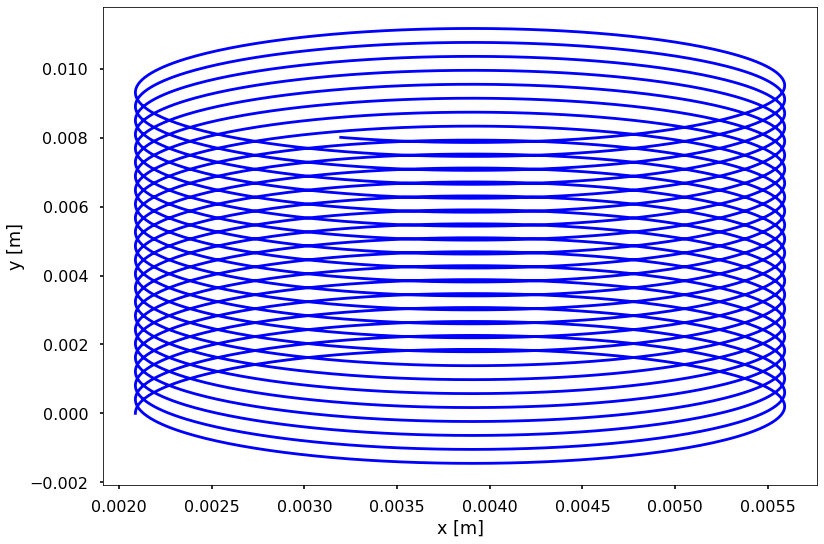

In [115]:
plt.figure(1)
plt.plot( y_rk[:,0], y_rk[:,1], 'b-', label='Runge-Kutta (4th)' )
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.show()

In [116]:
    # Get components of the state vector
    x  = y_rk[:,0]
    y  = y_rk[:,1]
    z  = y_rk[:,2]
    vx = y_rk[:,3]
    vy = y_rk[:,4]
    vz = y_rk[:,5]

In [117]:
    # Campo magnético ao longo da trajetória
    Bnorm = np.zeros(x.size)
    for i in range(x.size):
        Bx, By, Bz = Bfield(x[i], y[i], z[i])
        Bnorm[i] = np.sqrt(Bx*Bx + By*By + Bz*Bz)

In [118]:
    # Energia cinética perpendicular [eV]
    E_kin_perp = 0.5 * mp * ( vx*vx + vy*vy ) / qe

In [119]:
    # Magnetic moment along the trajectory [eV/T]
    mu = np.zeros(x.size)
    for i in range(x.size):
        mu[i] = E_kin_perp[i] / Bnorm[i]

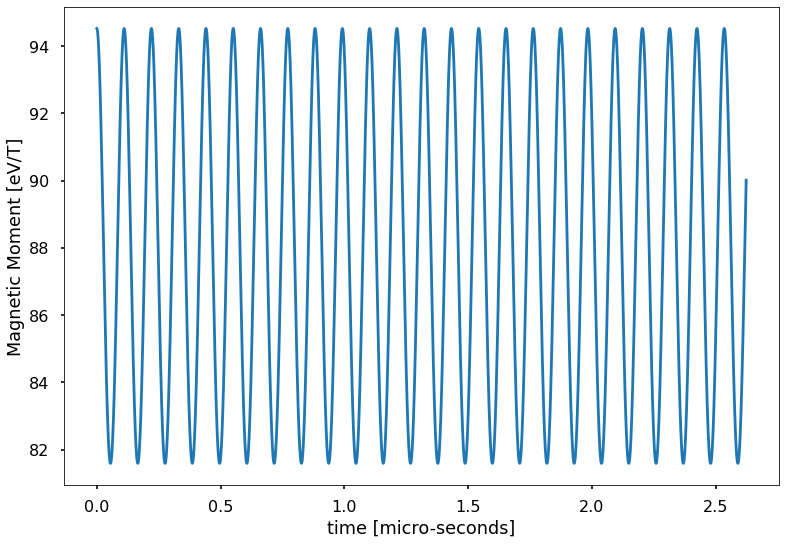

In [120]:
    plt.figure(2)
    plt.plot( t*1e6, mu )
    plt.xlabel('time [micro-seconds]')
    plt.ylabel('Magnetic Moment [eV/T]')
    plt.show()

# Exemplo: Grad B em um torus



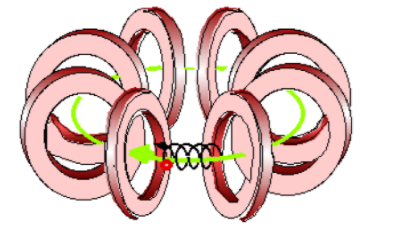



> Fonte: https://www.mdpi.com/1996-1073/3/11/1741/htm



In [121]:
def Bfield(x,y,z):
    B0 = 0.5
    # Raio maior (projecao)
    R = np.sqrt( x*x + y*y )
    # Sin, Cos da posicao da particula no plano (x,y)
    ca = x/R
    sa = y/R
    # B-field [T]
    Bx = -B0 * sa
    By =  B0 * ca
    Bz =  0.0
    return Bx, By, Bz

In [122]:
    # Initial velocity [m/s]
    vy0 = 1.0e6
    vz0 = 1.0e6

    # Magnetic Field at the origin [T]
    Bz = 0.5

    # Larmor pulsation [rad/s]
    w_L = np.abs(qm * Bz)

    # Larmor period [s]
    tau_L = 2.0*np.pi / w_L

    # Larmor radius [m]
    r_L = vy0 / w_L

    # Initial conditions
    X0 = np.array( [ 0.72, 0.0, 0.0, 0.0, vy0, vz0 ] )

    # Number of Larmor gyrations
    N_gyro = 30

    # Number of points per gyration
    N_points_per_gyration = 100

In [123]:
tmax = tau_L*N_gyro
N =  N_gyro*N_points_per_gyration 
h = tau_L*N_gyro/N

In [124]:
y_rk,t = rk4( fun, h, X0, tmax  )

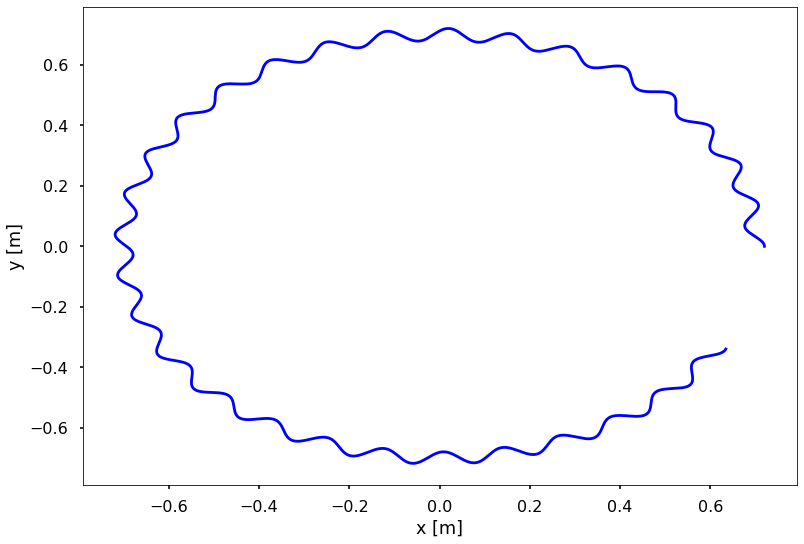

In [125]:
plt.figure(1)
plt.plot( y_rk[:,0], y_rk[:,1], 'b-', label='Runge-Kutta (4th)' )
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.show()

In [126]:
    x  = y_rk[:,0]
    y  = y_rk[:,1]
    z  = y_rk[:,2]
    vx = y_rk[:,3]
    vy = y_rk[:,4]
    vz = y_rk[:,5]

In [127]:
    R = np.sqrt(x*x + y*y)


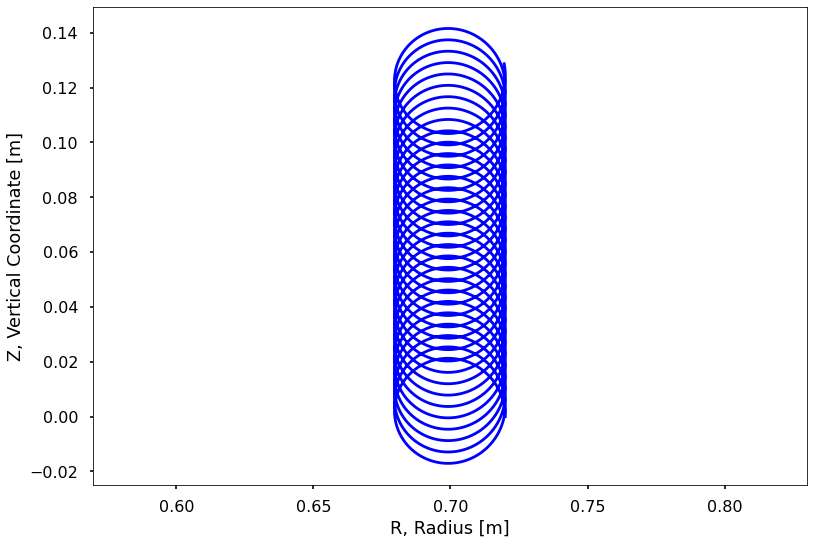

In [128]:
    plt.figure(2)
    plt.plot( R, z, 'b-')
    plt.xlabel('R, Radius [m]')
    plt.ylabel('Z, Vertical Coordinate [m]')
    plt.axis('equal')
#    plt.savefig('ex02_drift_grad_B_vertical_drift.png')
    plt.show()

# Exemplo: Grad E linear

In [59]:
# E-field em x=0
E0 = 10.0

# E-field gradiente
Eg = 200.0

def Efield(x,y,z):
    Ex = E0 + Eg*x
    Ey = 0.0
    Ez = 0.0
    return Ex, Ey, Ez

In [54]:
def Bfield(x,y,z):
    Bx = 0.0
    By = 0.0
    Bz = 0.0
    return Bx, By, Bz

In [56]:
# Initial position [m]
x0 = 0.5
y0 = 0.0
z0 = 0.0

    # Initial velocity [m/s]
vx0 = 1000
vy0 = 0.0
vz0 = 0.0

    # Initial conditions
X0 = np.array( [ x0, y0, z0, vx0, vy0, vz0 ] )

    # Time interval
T = 5.0e-6


In [57]:
tmax = T
N =  50 
h = tmax / N

In [60]:
y_rk,t = rk4( fun, h, X0, tmax  )

In [61]:
    # Separando as componentes:
    x  = y_rk[:,0]
    y  = y_rk[:,1]
    z  = y_rk[:,2]
    vx = y_rk[:,3]
    vy = y_rk[:,4]
    vz = y_rk[:,5]

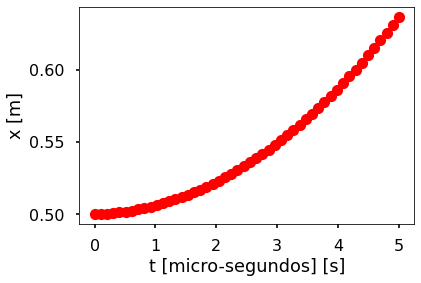

In [64]:
    plt.figure(1)
    plt.plot( t*1e6, x,    'ro', label='Runge-Kutta (4th)' )
    plt.xlabel('t [micro-segundos] [s]')
    plt.ylabel('x [m]')
    plt.show()

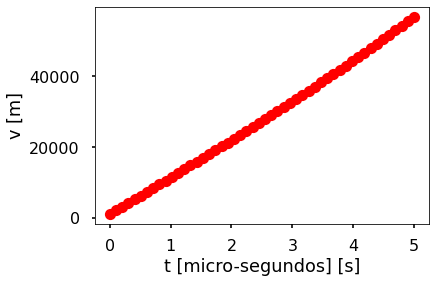

In [65]:
    plt.figure(1)
    plt.plot( t*1e6, vx,    'ro', label='Runge-Kutta (4th)' )
    plt.xlabel('t [micro-segundos] [s]')
    plt.ylabel('v [m]')
    plt.show()